# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

Link kagle: https://www.kaggle.com/equeiroz/acidentes-rodovias-federais-brasil-jan07-a-jul19

Link do .csv no drive: https://drive.google.com/drive/folders/1T5AcEd15lx59zlK-aHLN3Tdnq4PNbD7S?usp=sharing

Essa base despertou meu interesse por se tratar de uma realidade brasileira. As causas de acidentes ocorrem pelas condições das estradas? Pelas imperícias dos motoristas? Existem mais acidentes em curvas ou em períodos de chuva?
Essas são algumas das perguntas que passam na minha cabeça quando vejo uma notícia de acidente, logo será interessante ter essas respostas através da análise dos dados.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


*Descrição da base e suas variáveis*

Essa base é composta pelos dados da Polícia Rodoviária Federal sobre os registros de ocorrências de acidentes nas rodovias federais brasileiras no período de 01/2007 a 07/2019. Possui 24 colunas e 1.758.765 registros, sendo composta pelas seguintes variáveis:

CATEGÓRICAS:

- id - identificador da ocorrência.
- uf - sigla dos estados.
- br - números das BRs.
- municipio - cidades onde ocorreram os acidentes
- causa_acidente - causa do acidente (velocidade, ingestão de álcool, etc.).
- tipo_acidente - tipo de acidente (colisão, atropelamentos, etc.).
- classificacao_acidente - se possui vítimas ou não.
- fase_dia - período do dia (dia, tarde, noite).
- sentido_via - se crescente ou decrescente.
- condicao_metereologica - clima na data de ocorrência.
- tipo_pista - se simples, dupla, etc.
- tracado_via - se reta, com curva, etc.
- uso_solo - uso rural ou urbano.

CONTÍNUAS:

- data_inversa - data da ocorrência.
- horario - horário do registro.

DISCRETAS:

- pessoas - quantidade de pessoas envolvidas no acidente.
- mortos - quantidade de mortos.
- feridos_leves - quantidade de feridos leves.
- feridos_graves - quantidade de feridos graves.
- ilesos - quantidade de ilesos.
- ignorados - registros ignorados, sem classificação.
- feridos - quantidade de feridos leves e/ou graves.
- veiculos - quantidade de veículos envolvidos na ocorrência.

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [14]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('acidentes-rodovia-br.csv', low_memory=False)
df.drop(['Unnamed: 0', 'uso_solo', 'ignorados','feridos_leves', 'feridos_graves'], axis=1, inplace=True)
df.head(5)

,id,data_inversa,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,pessoas,mortos,ilesos,feridos,veiculos
0,1035523.0,2012-01-01,15:45:00,SC,282,513.7,XAXIM,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,2,0,1,1,1
1,1035527.0,2012-01-01,03:00:00,SC,280,188,MAFRA,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,Plena noite,Crescente,Chuva,Simples,Curva,3,0,2,1,2
2,1035528.0,2012-01-01,05:40:00,SC,116,1.5,MAFRA,Velocidade incompatível,Colisão com objeto fixo,Sem Vítimas,Plena noite,Crescente,Chuva,Simples,Cruzamento,1,0,1,0,1
3,1035530.0,2012-01-01,06:00:00,RO,364,616.5,ITAPUÃ DO OESTE,Outras,Saída de Pista,Com Vítimas Feridas,Pleno dia,Crescente,Ignorada,Simples,Reta,1,0,0,1,1
4,1035533.0,2012-01-01,16:30:00,RJ,101,47,CAMPOS DOS GOYTACAZES,Ingestão de álcool,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,Plena noite,Decrescente,Chuva,Simples,Reta,1,0,0,1,1


In [3]:
df.drop(df[df['uf'] == '(null)'].index, inplace=True)
df.drop(df[df['causa_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['tipo_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['classificacao_acidente'] == '(null)'].index, inplace=True)
df.drop(df[df['fase_dia'] == '(null)'].index, inplace=True)
df.drop(df[df['sentido_via'] == '(null)'].index, inplace=True)
df.drop(df[df['condicao_metereologica'] == '(null)'].index, inplace=True)
df.drop(df[df['tipo_pista'] == '(null)'].index, inplace=True)
df.drop(df[df['tracado_via'] == '(null)'].index, inplace=True)

In [4]:
print('Números de linhas:', df.shape[0])
print('Números de colunas:', df.shape[1])
print('Colunas presentes: ')
print(df.columns)

Números de linhas: 1758604
Números de colunas: 20
Colunas presentes: 
Index(['id', 'data_inversa', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'pessoas', 'mortos', 'ilesos', 'feridos', 'veiculos'],
      dtype='object')


In [5]:
print('Porcentagem de dados ausentes: \n')
print(round(df.isnull().mean() * 100, 2))

Porcentagem de dados ausentes: 

id                        0.00
data_inversa              0.00
horario                   0.00
uf                        0.00
br                        0.02
km                        0.02
municipio                 0.00
causa_acidente            0.00
tipo_acidente             0.00
classificacao_acidente    0.00
fase_dia                  0.00
sentido_via               0.00
condicao_metereologica    0.00
tipo_pista                0.00
tracado_via               0.00
pessoas                   0.00
mortos                    0.00
ilesos                    0.00
feridos                   0.00
veiculos                  0.00
dtype: float64


In [6]:
print('Porcentagem de dados duplicados:')
print(round(df.duplicated().mean() * 100, 2))

Porcentagem de dados duplicados:
0.0


In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True)

df.dtypes

id                        float64
data_inversa               object
horario                    object
uf                         object
br                         object
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
pessoas                     int64
mortos                      int64
ilesos                      int64
feridos                     int64
veiculos                    int64
dtype: object

In [8]:
def limpeza_texto(texto):
    texto = texto.lower()
    texto = texto.strip()
    return texto

In [9]:
df['municipio'] = df['municipio'].apply(limpeza_texto)
df['causa_acidente'] = df['causa_acidente'].apply(limpeza_texto)
df['tipo_acidente'] = df['tipo_acidente'].apply(limpeza_texto)
df['classificacao_acidente'] = df['classificacao_acidente'].apply(limpeza_texto)
df['fase_dia'] = df['fase_dia'].apply(limpeza_texto)
df['sentido_via'] = df['sentido_via'].apply(limpeza_texto)
df['condicao_metereologica'] = df['condicao_metereologica'].apply(limpeza_texto)
df['tipo_pista'] = df['tipo_pista'].apply(limpeza_texto)
df['tracado_via'] = df['tracado_via'].apply(limpeza_texto)

In [10]:
df['id'] = df['id'].astype('int32')
df['mortos'] = df['mortos'].astype('int16')
df['ilesos'] = df['ilesos'].astype('int16')
df['pessoas'] = df['pessoas'].astype('int16')
df['feridos'] = df['feridos'].astype('int16')
df['veiculos'] = df['veiculos'].astype('int16')

In [11]:
df['data'] = df['data_inversa'].map(str) + ' ' + df.horario
df['data'] = pd.to_datetime(df['data'])

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

df.drop(['data_inversa', 'horario'], axis=1, inplace=True)

In [12]:
df_2007_2018 = df[df['ano']!= 2019]

print('Números de linhas:', df_2007_2018.shape[0])
print('Números de colunas:', df_2007_2018.shape[1])
df_2007_2018['ano'].sort_values().unique()

Números de linhas: 1720498
Números de colunas: 21


array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Text(0.5, 1.0, 'Classificação dos acidentes em relação às vítimas (%)')

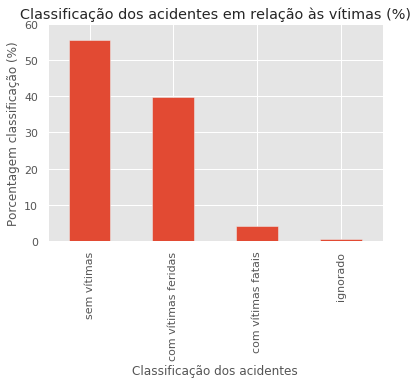

In [15]:
round(df_2007_2018['classificacao_acidente'].value_counts(normalize=True) * 100, 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 60)

plt.ylabel('Porcentagem classificação (%)')
plt.xlabel('Classificação dos acidentes')
plt.title('Classificação dos acidentes em relação às vítimas (%)')

Text(0.5, 1.0, 'Acidentes por estado (%)')

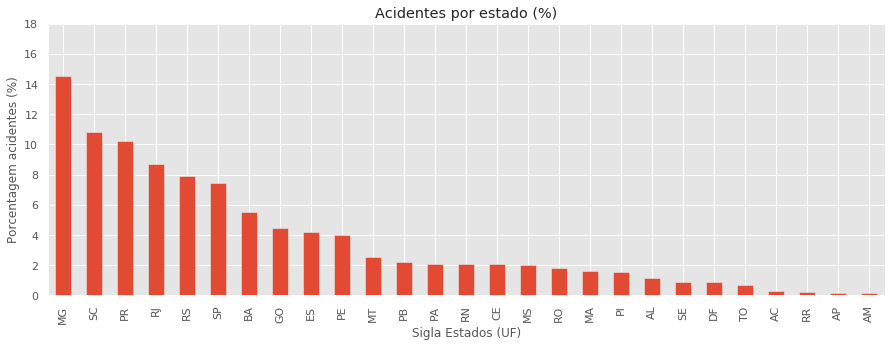

In [16]:
round(df_2007_2018['uf'].value_counts(normalize=True) * 100, 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 18)

plt.ylabel('Porcentagem acidentes (%)')
plt.xlabel('Sigla Estados (UF)')
plt.title('Acidentes por estado (%)')

Text(0.5, 1.0, 'As 10 cidades mineiras com maior ocorrência de acidentes')

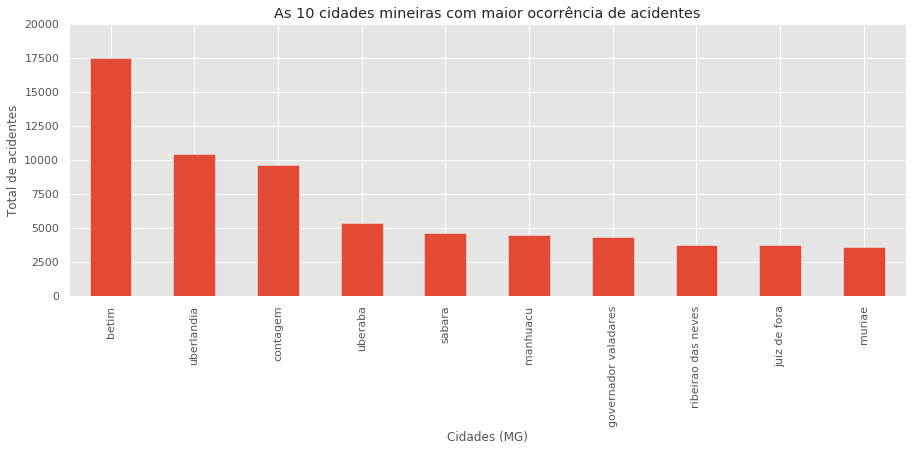

In [17]:
municipios = df_2007_2018[df_2007_2018['uf'] == 'MG']

municipios['municipio'].value_counts().sort_values(ascending=False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 20000)

plt.ylabel('Total de acidentes')
plt.xlabel('Cidades (MG)')
plt.title('As 10 cidades mineiras com maior ocorrência de acidentes')

Text(0.5, 1.0, 'As 10 principais causas de acidentes')

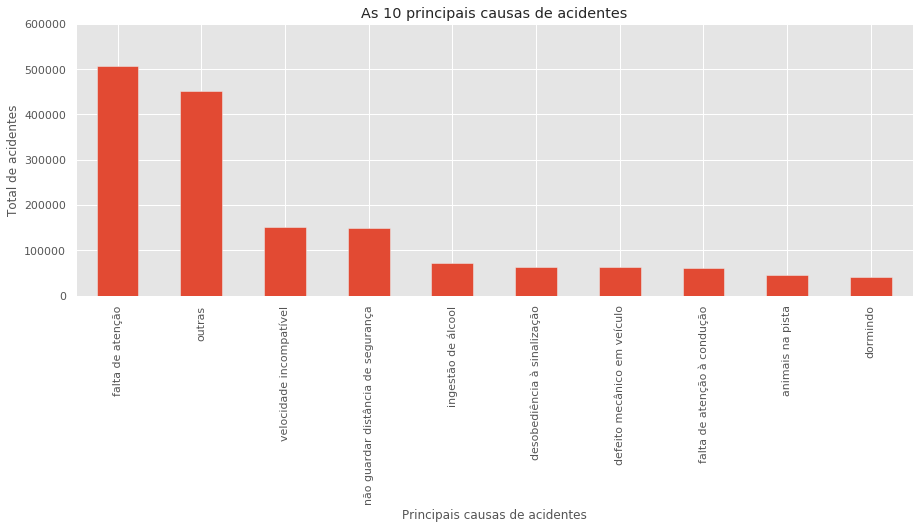

In [18]:
df_2007_2018['causa_acidente'].value_counts().head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 600000)

plt.ylabel('Total de acidentes')
plt.xlabel('Principais causas de acidentes')
plt.title('As 10 principais causas de acidentes')

Text(0.5, 1.0, 'Quantidade de mortos por UF entre 2007 e 2018')

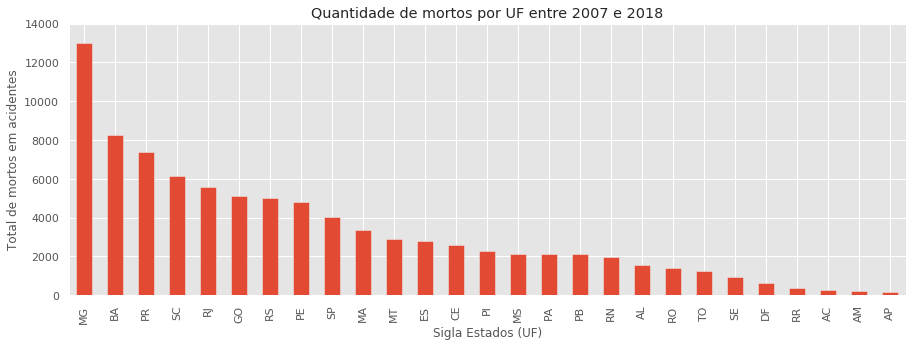

In [19]:
df_2007_2018.groupby(['uf'])['mortos'].sum().sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 14000)

plt.ylabel('Total de mortos em acidentes')
plt.xlabel('Sigla Estados (UF)')
plt.title('Quantidade de mortos por UF entre 2007 e 2018')

Text(0.5, 1.0, 'Quantidade de acidentes por ano (2007-2018)')

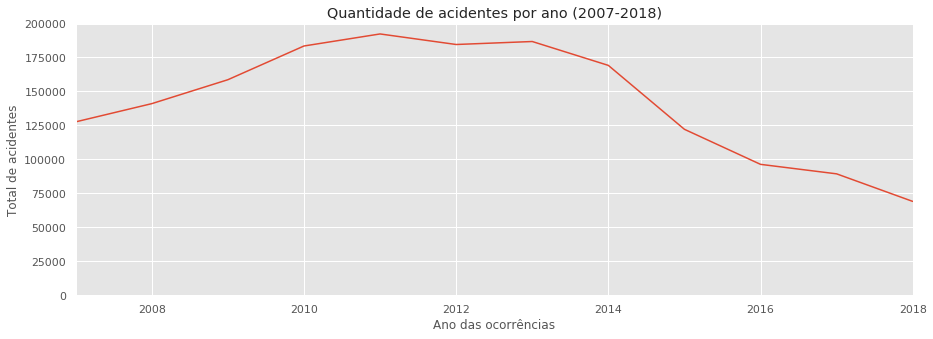

In [30]:
df_2007_2018.groupby(['ano'])['id'].count().plot.line()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 200000)

plt.ylabel('Total de acidentes')
plt.xlabel('Ano das ocorrências')
plt.title('Quantidade de acidentes por ano (2007-2018)')

Text(0.5, 1.0, 'Quantidade de acidentes por mês (2007-2018)')

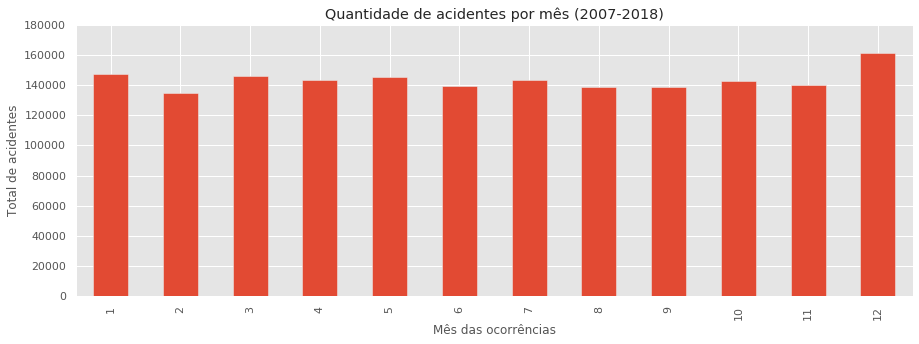

In [20]:
df_2007_2018.groupby(['mes'])['id'].count().plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 180000)

plt.ylabel('Total de acidentes')
plt.xlabel('Mês das ocorrências')
plt.title('Quantidade de acidentes por mês (2007-2018)')

Text(0.5, 1.0, 'Fase do dia em que ocorreram os acidentes')

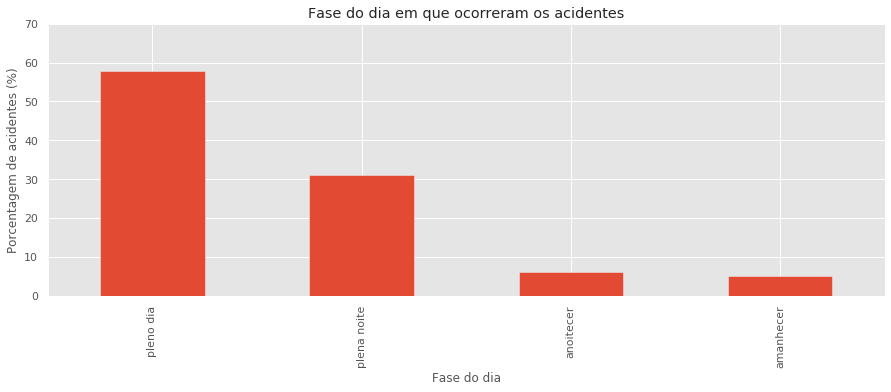

In [21]:
round(df_2007_2018['fase_dia'].value_counts(normalize=True) * 100, 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 70)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Fase do dia')
plt.title('Fase do dia em que ocorreram os acidentes')

Text(0.5, 1.0, 'Traçado das vias onde ocorreram os acidentes')

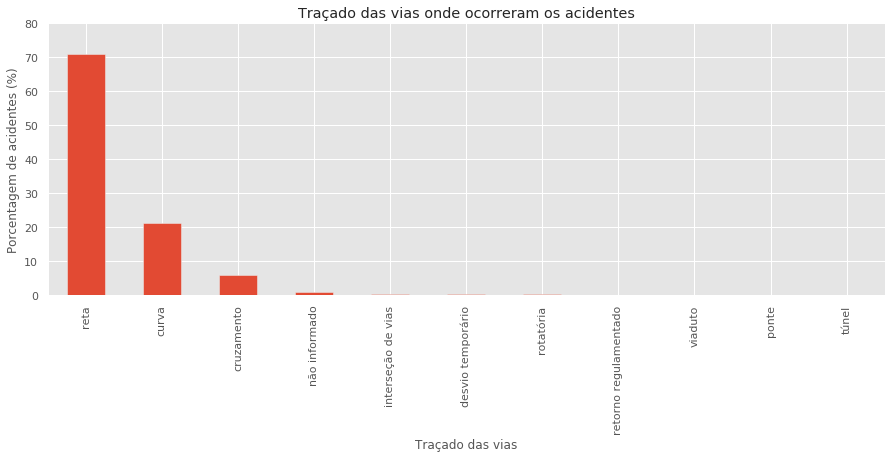

In [22]:
round(df_2007_2018['tracado_via'].value_counts(normalize=True) * 100, 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 80)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Traçado das vias')
plt.title('Traçado das vias onde ocorreram os acidentes')

Text(0.5, 1.0, 'Top 5 da quantidade de veículos envolvidos nas ocorrências de acidentes')

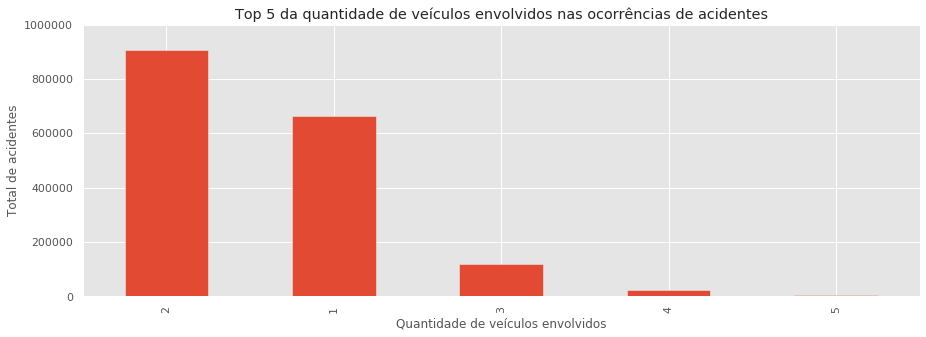

In [23]:
df_2007_2018.groupby(['veiculos'])['id'].count().sort_values(ascending=False).head(5).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 1000000)

plt.ylabel('Total de acidentes')
plt.xlabel('Quantidade de veículos envolvidos')
plt.title('Top 5 da quantidade de veículos envolvidos nas ocorrências de acidentes')

In [24]:
def padroniza_texto(texto):
    if texto == 'ceu claro':
        texto = 'céu claro'
    elif texto == 'ignorado':
        texto = 'ignorada'    
    return texto

df_2007_2018['condicao_metereologica'] = df_2007_2018['condicao_metereologica'].apply(padroniza_texto)

Text(0.5, 1.0, 'Condições meteorológicas durante a ocorrência de acidentes')

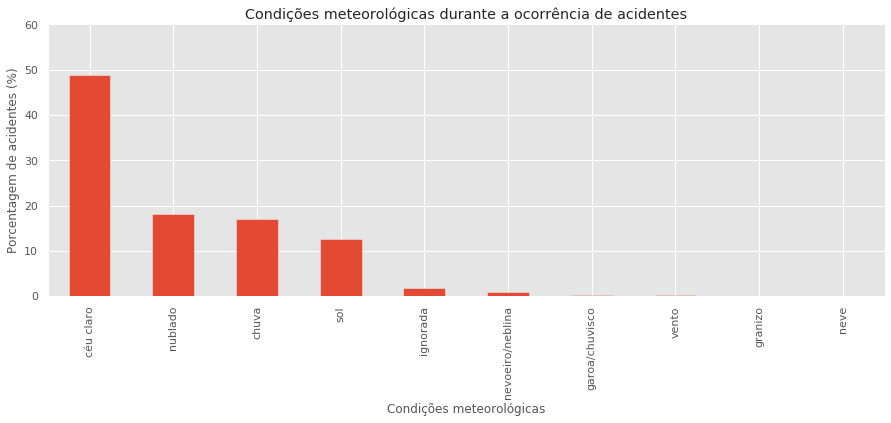

In [25]:
round((df_2007_2018.groupby(['condicao_metereologica'])['id'].count() * 100) / len(df_2007_2018), 2).sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 60)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Condições meteorológicas')
plt.title('Condições meteorológicas durante a ocorrência de acidentes')

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >10000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [31]:
from datetime import date

In [32]:
def estacao_ano(data):
   
    dia = data.day
    mes = data.month
       
    if mes < 3:
        estacao = 'verão'
        
    if mes == 3 and dia <= 19:  
        estacao = 'verão'
    
    if mes == 12 and dia >= 22:
        estacao = 'verão'
        
        
    if mes == 3 and dia >= 20:
        estacao = 'outono'
        
    if mes < 6 and mes > 3:
        estacao = 'outono'
        
    if mes == 6 and dia <= 20:
        estacao = 'outono'
        
        
    if mes == 6 and dia >= 21:
        estacao = 'inverno'
    
    if mes < 9 and mes > 6:
        estacao = 'inverno'
        
    if mes == 9 and dia <= 22:
        estacao = 'inverno'
        
    
    if mes == 12 and dia <= 21:
        estacao = 'primavera'
        
    if mes == 9 and dia >= 23:
        estacao = 'primavera'
    
    if mes < 12 and mes > 9:
        estacao = 'primavera'
    
    return estacao

df_2007_2018['estacao_do_ano'] = df_2007_2018['data'].apply(estacao_ano)

In [33]:
df_2007_2018.groupby(['estacao_do_ano'])['id'].count().to_frame().reset_index()

,estacao_do_ano,id
0,inverno,429850
1,outono,438985
2,primavera,426207
3,verão,425456


Text(0.5, 1.0, 'Existe um aumento de acidentes dependendo da estação do ano?')

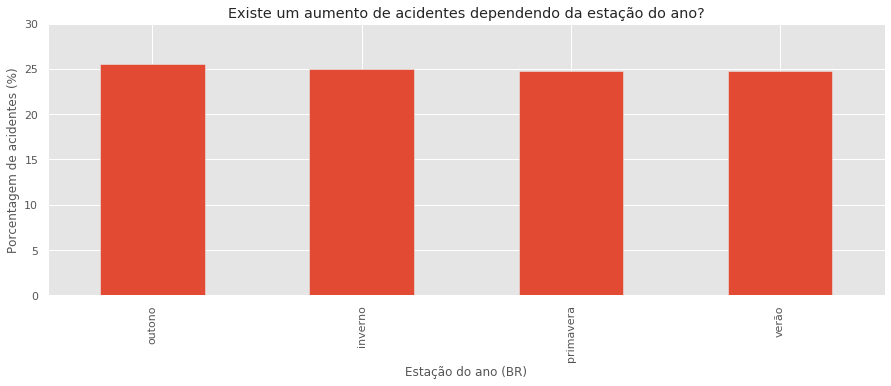

In [34]:
round((df_2007_2018.groupby(['estacao_do_ano'])['id'].count() * 100) / len(df_2007_2018), 2).sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 30)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Estação do ano (BR)')
plt.title('Existe um aumento de acidentes dependendo da estação do ano?')

In [35]:
DIAS = [
    'segunda-feira',
    'terça-feira',
    'quarta-feira',
    'quinta-Feira',
    'sexta-feira',
    'sábado',
    'domingo'
]

def dia_semana(data):
   
    data = date(year=data.year, month=data.month, day=data.day)
    indice_da_semana = data.weekday()
    dia_semana = DIAS[indice_da_semana]
    
    return dia_semana

df_2007_2018['dia_da_semana'] = df_2007_2018['data'].apply(dia_semana)

In [36]:
df_2007_2018.groupby(['dia_da_semana'])['id'].count().to_frame().reset_index()

,dia_da_semana,id
0,domingo,254362
1,quarta-feira,228881
2,quinta-Feira,238827
3,segunda-feira,238795
4,sexta-feira,271852
5,sábado,263163
6,terça-feira,224618


Text(0.5, 1.0, 'Existe um aumento de acidentes dependendo do dia da semana?')

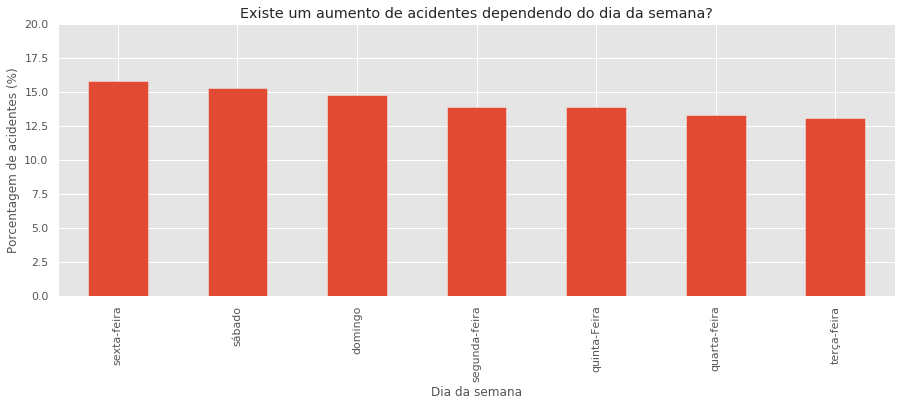

In [37]:
round((df_2007_2018.groupby(['dia_da_semana'])['id'].count() * 100) / len(df_2007_2018), 2).sort_values(ascending=False).plot.bar()


plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 20)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Dia da semana')
plt.title('Existe um aumento de acidentes dependendo do dia da semana?')

In [38]:
def regiao_pais(uf):
   
    if uf == 'AM' or uf == 'AC' or uf == 'RO' or uf == 'RR' or uf == 'AP' or uf == 'PA' or uf =='TO':
        regiao = 'norte'
        
    elif uf == 'MA' or uf == 'PI' or uf == 'RN' or uf == 'CE' or uf == 'PB' or uf == 'BA' or uf =='PE' or uf =='AL' or uf =='SE':
        regiao = 'nordeste'
        
    elif uf == 'MS' or uf == 'MT' or uf == 'GO' or uf == 'DF':
        regiao = 'centro-oeste'
   
    elif uf == 'MG' or uf == 'ES' or uf == 'RJ' or uf == 'SP':
        regiao = 'sudeste'
        
    elif uf == 'SC' or uf == 'PR' or uf == 'RS':
        regiao = 'sul'
    
    return regiao

df_2007_2018['regiao_pais'] = df_2007_2018['uf'].apply(regiao_pais)

In [39]:
df_2007_2018.groupby(['regiao_pais'])['id'].count().to_frame().reset_index()

,regiao_pais,id
0,centro-oeste,169129
1,nordeste,360751
2,norte,92323
3,sudeste,601203
4,sul,497092


Text(0.5, 1.0, 'Existe um aumento de acidentes dependendo da região do país?')

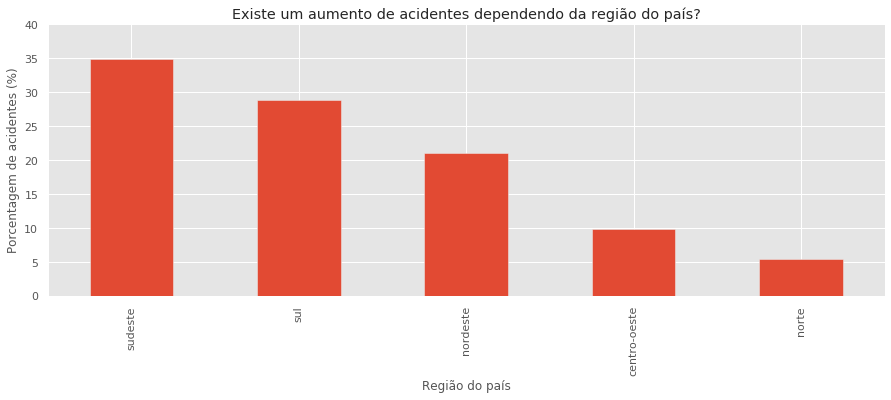

In [40]:
round((df_2007_2018.groupby(['regiao_pais'])['id'].count() * 100) / len(df_2007_2018), 2).sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 40)

plt.ylabel('Porcentagem de acidentes (%)')
plt.xlabel('Região do país')
plt.title('Existe um aumento de acidentes dependendo da região do país?')

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [ ]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [41]:
df_corr_acidente_ano = df_2007_2018.groupby(['ano'])['id'].count().to_frame().reset_index()
print('Correlação total de acidentes x ano:') 
df_corr_acidente_ano['ano'].corr(df_corr_acidente_ano['id'])

Correlação total de acidentes x ano:


-0.5697072842500421

In [65]:
df_corr_acidente_ano

,ano,id
0,2007,127627
1,2008,141029
2,2009,158637
3,2010,183451
4,2011,192312
5,2012,184549
6,2013,186746
7,2014,169178
8,2015,122147
9,2016,96358


Text(0.5, 1.0, 'Correlação total de acidentes x ano')

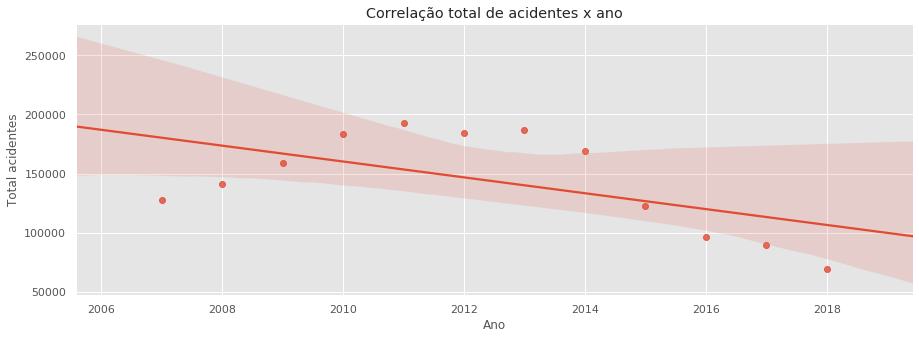

In [79]:
ax = sns.regplot(x=df_corr_acidente_ano['ano'], y=df_corr_acidente_ano['id'], data=df_corr_acidente_ano)

plt.rcParams['figure.figsize'] = [15, 5]

plt.ylabel('Total acidentes')
plt.xlabel('Ano')
plt.title('Correlação total de acidentes x ano')

In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [47]:
mapa_estacao = {
                'outono' : 1, 
                'inverno': 2, 
                'verão': 3, 
                'primavera': 4 
               }

df_corr_acidente_estacao = df_2007_2018.groupby(['estacao_do_ano'])['id'].count().to_frame().reset_index()
df_corr_acidente_estacao['classe'] = df_corr_acidente_estacao['estacao_do_ano'].apply(lambda x : mapa_estacao[x])

print('Correlação acidentes x estação do ano:')
df_corr_acidente_estacao['classe'].corr(df_corr_acidente_ano['id'])

Correlação acidentes x estação do ano:


0.5814563417978266

In [81]:
df_corr_acidente_estacao.sort_values(by=['classe'])

,estacao_do_ano,id,classe
1,outono,438985,1
0,inverno,429850,2
3,verão,425456,3
2,primavera,426207,4


Text(0.5, 1.0, 'Correlação total de acidentes x estação do ano')

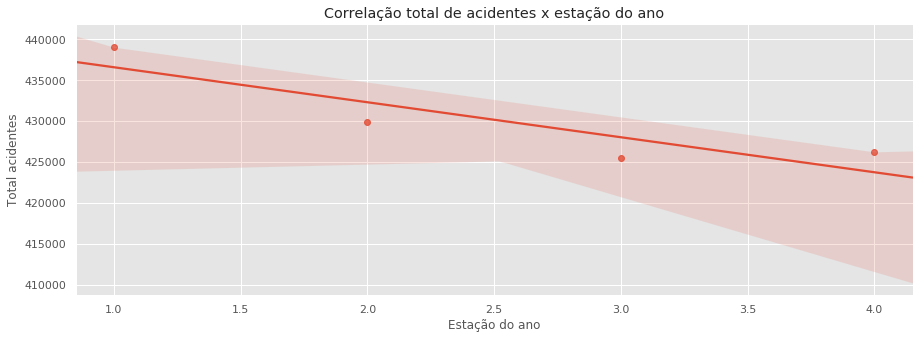

In [82]:
ax = sns.regplot(x=df_corr_acidente_estacao['classe'], y=df_corr_acidente_estacao['id'], data=df_corr_acidente_estacao)

plt.rcParams['figure.figsize'] = [15, 5]

plt.ylabel('Total acidentes')
plt.xlabel('Estação do ano')
plt.title('Correlação total de acidentes x estação do ano')

In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [70]:
mapa_clima = {
    'sol' :   1,
    'chuva' : 2,
    'nublado' : 3,
    'céu claro' : 4,
    'vento' : 5,
    'neve' : 6,
    'nevoeiro/neblina' : 7, 
    'granizo' : 8, 
    'garoa/chuvisco': 9
}

df_corr_acidente_clima = df_2007_2018[df_2007_2018['condicao_metereologica'] != 'ignorada']
df_corr_acidente_clima = df_corr_acidente_clima.groupby(['condicao_metereologica'])['id'].count().to_frame().reset_index()
df_corr_acidente_clima['clima_classe'] = df_corr_acidente_clima['condicao_metereologica'].apply(lambda x : mapa_clima[x])

print('Correlação total de acidentes x clima:')
df_corr_acidente_clima['clima_classe'].corr(df_corr_acidente_clima['id'])

Correlação total de acidentes x clima:


-0.5176324494756843

In [86]:
df_corr_acidente_clima.sort_values(by=['clima_classe'])

,condicao_metereologica,id,clima_classe
7,sol,216983,1
0,chuva,293242,2
6,nublado,311693,3
1,céu claro,839507,4
8,vento,4637,5
4,neve,106,6
5,nevoeiro/neblina,17638,7
3,granizo,295,8
2,garoa/chuvisco,5443,9


Text(0.5, 1.0, 'Correlação total de acidentes x clima')

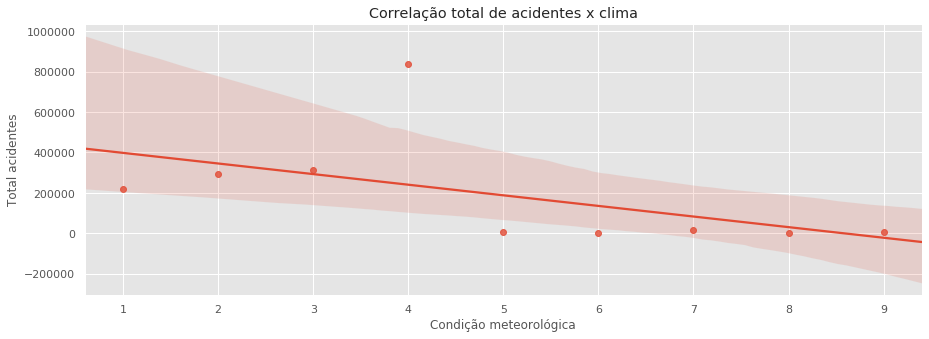

In [87]:
ax = sns.regplot(x=df_corr_acidente_clima['clima_classe'], y=df_corr_acidente_clima['id'], data=df_corr_acidente_clima)

plt.rcParams['figure.figsize'] = [15, 5]

plt.ylabel('Total acidentes')
plt.xlabel('Condição meteorológica')
plt.title('Correlação total de acidentes x clima')

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Podemos inferir, de acordo com os dados analisados acima, que do total de acidentes compreendidos entre janeiro de 2007 e dezembro de 2018:

- Aproximadamente, 55% dos acidentes foram classificados como sem vítimas.
- Minas Gerais possui a maior % de acidentes (~14,5%), provavelmente por possuir a maior malha rodoviária do país.
- Minas Gerais possui a maior quantidade de mortes em acidentes nas rodovias com um total de 13.011 falecidos.
- Em MG, a cidade em que ocorre mais acidentes é Betim (17.465).
- A principal causa de acidentes é a falta de atenção, com um total de 507.384 ocorrências nesse período.
- Houve um aumento gradativo das ocorrências de acidentes entre 2007 e 2011. Tivemos uma queda significativa em 2012 e após um aumento em 2013, as ocorrências voltaram a cair e mativeram esse padrão de queda até o ano 2018.
- Em média, 57% dos acidentes ocorreram durante o dia.
- Cerca de 70% das ocorrências foram em pistas com traçado reto.
- A maioria dos acidentes envolveu dois veículos (904.764).
- Dezembro (161.302) e Janeiro (147.531) são os meses com maiores registros de ocorrências.
- 48.79% dos acidentes ocorreram em dias de céu claro.

Conforme análise de dependências de variáveis no ítem 4.2, pode-se perceber que:

- A quantidade de acidentes não aumenta/diminui dependendo do dia da semana ou da estação do ano, visto que em ambos os casos, temos uma distribuição equilibrada como demonstra o gráfico. Por sua vez, a quantidade de acidentes parece aumentar/diminuir a depender da região do país, o motivo deve ser investigado com mais detalhes.

De acordo com a análise de correlação realizada no ítem 4.3, percebe-se que:

- Existe uma correlação negativa moderada entre as variáveis ano x total de acidentes e entre condição meteorológica x total de acidentes.

- Existe uma correlação positiva moderada entre a estação do ano x total de acidentes.

Essas são as informações mais importante obtidas através da análise exploratória do conjunto de dados, pois acredito que representam os pontos principais nos quais focar para o desenvolvimento de uma tratativa para a redução de acidentes nas rodovias federais do país.